In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from matplotlib import pyplot


In [3]:
fifaData = pd.read_csv("fifa23.csv")

In [201]:
fifaData.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [4]:
fifaData.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [205]:
fifaData.shape

(18539, 89)

In [5]:
labelEncoder = preprocessing.LabelEncoder()
categoricalVariables = ["Nationality", 'Club Name', 'Best Position', 'Defensive Work Rate']
fifaData[categoricalVariables] = fifaData[categoricalVariables].apply(labelEncoder.fit_transform)

In [161]:
LABEL = "Wage(in Euro)"
FEATURES = ["Nationality", 'Club Name', 'Best Position', 'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle','Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats']

X = fifaData[FEATURES]
ogX = fifaData[FEATURES +["Age", "BaseStats", "TotalStats", "Release Clause", "International Reputation", "Overall", "Potential", "ST Rating","LW Rating","LF Rating","CF Rating","RF Rating","RW Rating","CAM Rating","LM Rating","CM Rating","RM Rating","LWB Rating","CDM Rating","RWB Rating","LB Rating","CB Rating","RB Rating"]]
Y = fifaData[LABEL]

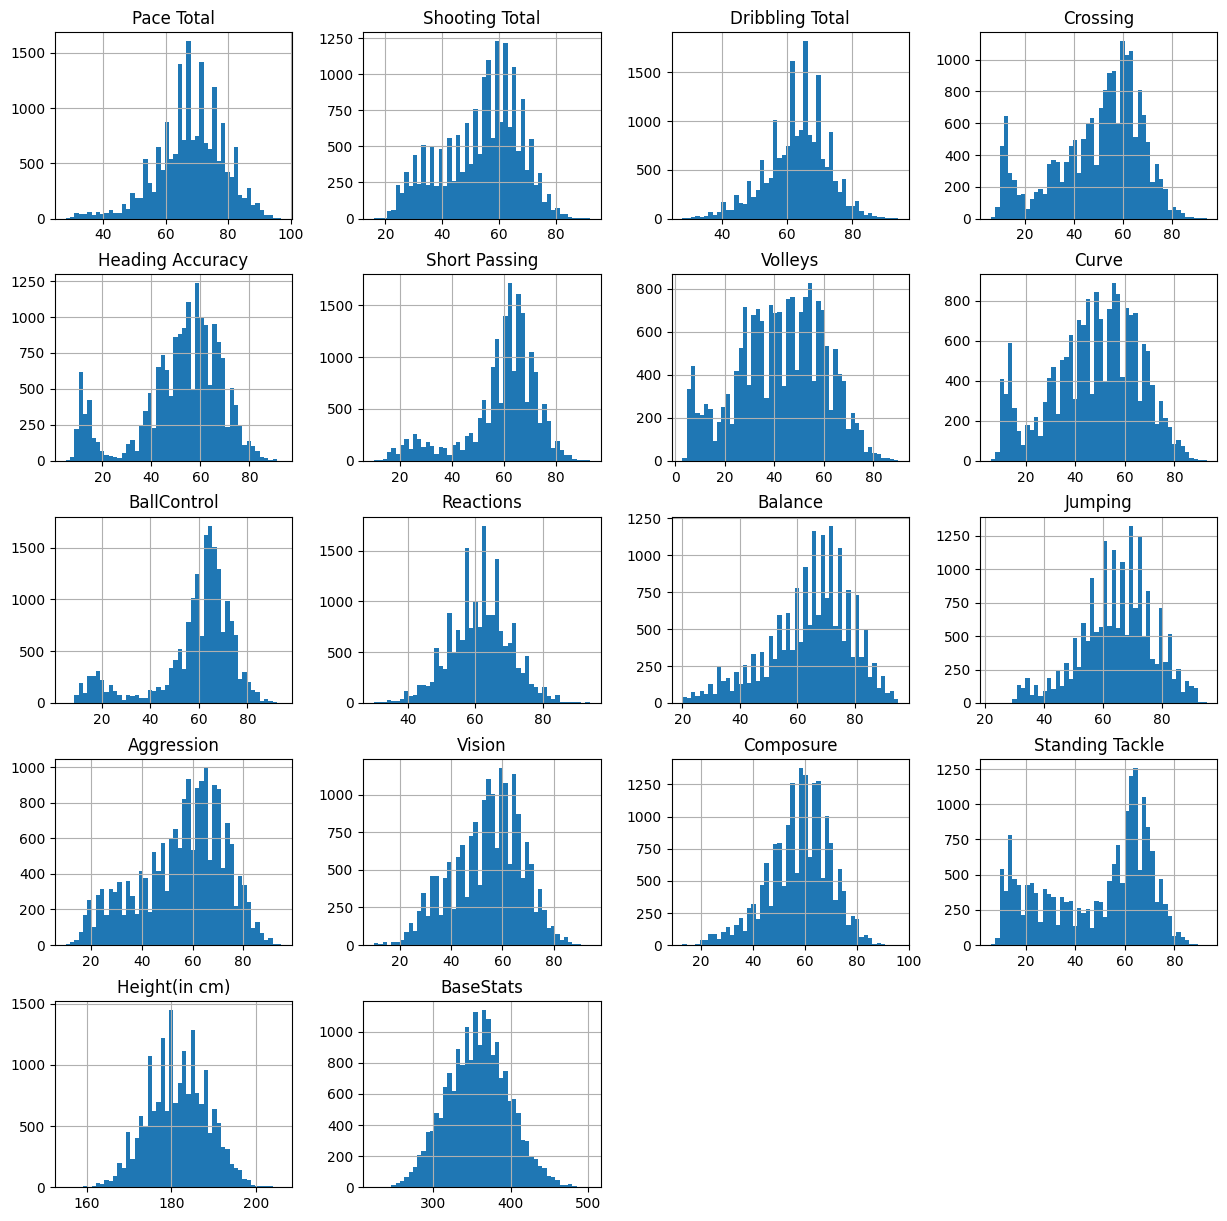

In [23]:
X.hist(bins=50, figsize=(15,15))
pyplot.show()

In [7]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101)

In [8]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
predictions = model.predict(X_test)

In [11]:
print(model.score(X_test, y_test))

0.321553732048531


In [10]:

# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  280401576.76497704
mean_absolute_error :  8606.782866309204


Feature: 0, Score: -4.77919
Feature: 1, Score: 0.36235
Feature: 2, Score: -46.59814
Feature: 3, Score: -439.86193
Feature: 4, Score: 169.86216
Feature: 5, Score: 434.60787
Feature: 6, Score: -151.11899
Feature: 7, Score: 109.19559
Feature: 8, Score: -58.76141
Feature: 9, Score: -324.72992
Feature: 10, Score: 135.15913
Feature: 11, Score: -157.56849
Feature: 12, Score: 191.20154
Feature: 13, Score: 194.44247
Feature: 14, Score: 149.03608
Feature: 15, Score: 60.99880
Feature: 16, Score: 147.90436
Feature: 17, Score: 50.84898
Feature: 18, Score: 71.32766
Feature: 19, Score: 197.38133
Feature: 20, Score: -34.09869
Feature: 21, Score: 40.45854
Feature: 22, Score: -26.01506
Feature: 23, Score: 760.47373
Feature: 24, Score: 123.00162
Feature: 25, Score: -21.84398
Feature: 26, Score: 120.86671
Feature: 27, Score: 23.23688
Feature: 28, Score: 73.82748
Feature: 29, Score: -160.32125
Feature: 30, Score: 135.12009
Feature: 31, Score: 15.12443
Feature: 32, Score: -20.78296
Feature: 33, Score: 120.3

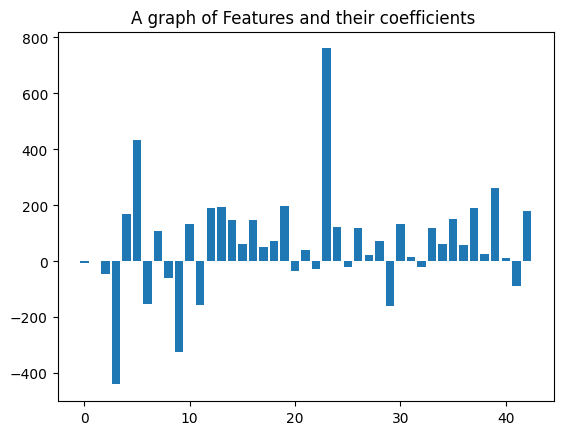

In [12]:
# feature importance
importance = model.coef_
thresholdColumns = []
# # summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
	if v >=100:
		thresholdColumns.append(i)
# plot feature importance
pyplot.title("A graph of Features and their coefficients ")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [13]:
cols = X.columns
max(importance)


760.4737341041156

In [14]:
cols[4]

'Pace Total'

# Reworked model

In [22]:
print(cols)

Index(['Nationality', 'Club Name', 'Best Position', 'Defensive Work Rate',
       'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total',
       'Defending Total', 'Physicality Total', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Height(in cm)',
       'Weight(in kg)', 'TotalStats', 'BaseStats'],
      dtype='object')


In [21]:
thresholdColumns
print(thresholdColumns)
# get column names for each threshold.
# change in place since thresholdColumns returns index values for the main datasets columns(cols)
for i in range(len(thresholdColumns)):
    thresholdColumns[i] = cols[thresholdColumns[i]]



[0, 2, 5, 9, 14, 16]


In [16]:
LABEL = "Wage(in Euro)"
FEATURES = thresholdColumns

X = fifaData[FEATURES]
Y = fifaData[LABEL]

In [17]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101)

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
model.score(X_test, y_test) #r^2 score

0.3078603091103481

Feature: 0, Score: 138.21876
Feature: 1, Score: 17.98961
Feature: 2, Score: 647.95135
Feature: 3, Score: -0.38714
Feature: 4, Score: 74.34464
Feature: 5, Score: 146.07418
Feature: 6, Score: 10.91711
Feature: 7, Score: 13.27545
Feature: 8, Score: -209.01653
Feature: 9, Score: 696.41406
Feature: 10, Score: -46.61894
Feature: 11, Score: 10.49115
Feature: 12, Score: -8.15335
Feature: 13, Score: -10.56359
Feature: 14, Score: 161.94199
Feature: 15, Score: 98.22900
Feature: 16, Score: 293.04359
Feature: 17, Score: -50.99799


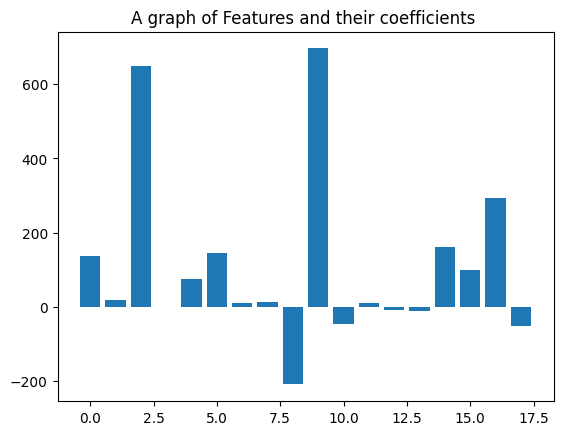

In [20]:
# feature importance
importance = model.coef_
thresholdColumns = []
# # summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
	if v >=100:
		thresholdColumns.append(i)
# plot feature importance
pyplot.title("A graph of reworked Features and their coefficients ")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Using a neural network

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [31]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

# Using lbfgs

In [35]:
clf = MLPRegressor(solver='lbfgs',  #uses  relu  as default activation function. transforms output from neuron
                   alpha=1e-5,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(6, 6), random_state=24)
clf.fit(X_trainscaled, y_train)

/Users/wgl8723/Desktop/School/SeniorYear/f22/AI/finalProject/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=1e-05, hidden_layer_sizes=(6, 6), random_state=24,
             solver='lbfgs')

In [36]:
y_pred=clf.predict(X_testscaled)

In [39]:
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.6167396685103359


# using Adam solver, relU activation and 3 hidden layers with 64 perceptron nodes

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)
reg.fit(X_trainscaled, y_train)

In [43]:
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.5155334588773482


In [ ]:
0.6057817875481128

# using more hidden layers

In [ ]:
reg = MLPRegressor(solver='lbfgs', 
                   alpha=1e-5,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(64, 64, 64, 64, 64, 64), random_state=24)
reg.fit(X_trainscaled, y_train)

In [51]:
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.6270802710864429


# RELU Alternatives (best so far)

In [109]:
clf = MLPRegressor(solver='lbfgs',  #uses  relu  as default activation function. transforms output from neuron
                   alpha=1e-10,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 10, 10, 10, 10, 10 ), random_state=24, max_iter=400)
clf.fit(X_trainscaled, y_train)

/Users/wgl8723/Desktop/School/SeniorYear/f22/AI/finalProject/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=1e-10, hidden_layer_sizes=(10, 10, 10, 10, 10, 10),
             max_iter=400, random_state=24, solver='lbfgs')

In [110]:
y_pred=clf.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.6756900210192749


# Other features

In [162]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    ogX, Y, test_size=0.3, random_state=101)

In [163]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [164]:
clf = MLPRegressor(solver='lbfgs',  #uses  relu  as default activation function. transforms output from neuron
                   alpha=1e-12,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(18, 18, 18, 18, 18, 18 ), random_state=24, max_iter=400)
clf.fit(X_trainscaled, y_train)

/Users/wgl8723/Desktop/School/SeniorYear/f22/AI/finalProject/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=1e-12, hidden_layer_sizes=(18, 18, 18, 18, 18, 18),
             max_iter=400, random_state=24, solver='lbfgs')

In [165]:
y_pred=clf.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7101024854895992


# v2 with different options (Best so far 72%)

In [199]:
clf = MLPRegressor(solver='lbfgs',  #uses  relu  as default activation function. transforms output from neuron
                   alpha=1e-12,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(18, 18, 18, 18, 18, 18 ), random_state=24, max_iter=420)
clf.fit(X_trainscaled, y_train)

/Users/wgl8723/Desktop/School/SeniorYear/f22/AI/finalProject/.venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=1e-12, hidden_layer_sizes=(19, 19, 19, 19, 19, 19),
             max_iter=420, random_state=24, solver='lbfgs')

In [200]:
y_pred=clf.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7013177545025788


In [ ]:
0.6625034014199065
0.7101024854895992
0.7098188453198224

# Using linear regression with more features

In [182]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    ogX, Y, test_size=0.3, random_state=101)

In [183]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [184]:
print(model.score(X_test, y_test))

0.7238380545036831


Feature: 0, Score: -5.82361
Feature: 1, Score: 0.57465
Feature: 2, Score: 76.10446
Feature: 3, Score: 12.28414
Feature: 4, Score: 102.88619
Feature: 5, Score: -22.85732
Feature: 6, Score: -73.13812
Feature: 7, Score: -10.61583
Feature: 8, Score: 116.93940
Feature: 9, Score: -124.42155
Feature: 10, Score: -17.02630
Feature: 11, Score: -165.90490
Feature: 12, Score: -32.62238
Feature: 13, Score: -141.47531
Feature: 14, Score: -6.38578
Feature: 15, Score: -144.42252
Feature: 16, Score: 33.12652
Feature: 17, Score: -19.25531
Feature: 18, Score: 55.81346
Feature: 19, Score: -193.15447
Feature: 20, Score: -154.11422
Feature: 21, Score: -95.89991
Feature: 22, Score: -72.01190
Feature: 23, Score: -17.27794
Feature: 24, Score: -7.36706
Feature: 25, Score: 12.65380
Feature: 26, Score: 18.38654
Feature: 27, Score: 10.76743
Feature: 28, Score: -22.15700
Feature: 29, Score: -67.37887
Feature: 30, Score: 28.21752
Feature: 31, Score: -75.88544
Feature: 32, Score: -107.74364
Feature: 33, Score: -53.03

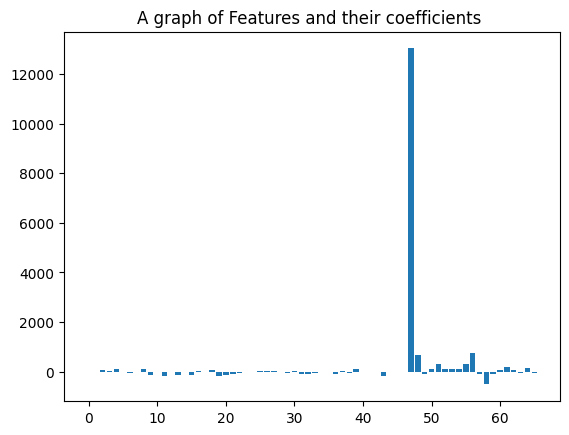

In [191]:
# feature importance
importance = model.coef_
thresholdDict = dict()
thresholdColumns = []
# # summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
	if v >=100:
		thresholdDict[i] = v
		thresholdColumns.append(i)
# plot feature importance
pyplot.title("A graph of Features and their coefficients ")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [188]:
thresholdDict

{4: 102.88619198600813,
 8: 116.93940259092473,
 39: 106.2251201762249,
 47: 13035.581601385456,
 48: 669.3427370187163,
 51: 307.1031934363259,
 55: 307.10319343631045,
 56: 731.8728666645458,
 61: 181.74048069971326,
 64: 130.2200141451197}

In [194]:
cols[47] #most influenction value

KeyError: 47

In [192]:
thresholdColumns
print(thresholdColumns)
# get column names for each threshold.
# change in place since thresholdColumns returns index values for the main datasets columns(cols)
for i in range(len(thresholdColumns)):
    thresholdColumns[i] = cols[thresholdColumns[i]]

[4, 8, 39, 47, 48, 51, 55, 56, 61, 64]


IndexError: index 47 is out of bounds for axis 0 with size 43

In [206]:
X.shape

(18539, 66)